### EDA for Denver ###

- For Frame of Reference:
| Year   |      Start of DST      |  End of DST |
|----------|:-------------:|------:|
| 2016 | March 13 | November 6 |
| 2017 | March 12 | November 5 |
| 2018 | March 11 | November 4 |
| 2019 | March 10 | November 3 |
| 2020 | March 8 | November 2 |

source: https://en.wikipedia.org/wiki/Main_Page

**Imports**

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import seaborn as sns
sns.set(style = "darkgrid")

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import datetime as dt

### Reading In Data ###

In [2]:
#original data:
dia_df_og = pd.read_csv('../data/dia_accidents.csv')

In [3]:
dia_df_og.head(3)

id  severity           start_time             end_time  start_lat  \
0  A-2749141         2  2016-11-30 14:46:48  2016-11-30 20:46:48  42.305960   
1  A-2749152         2  2016-11-30 14:58:59  2016-11-30 20:58:59  42.175870   
2  A-2749158         3  2016-11-30 15:14:24  2016-11-30 21:29:48  42.175897   

   start_lng    end_lat    end_lng  distance(mi)  \
0 -87.960150  42.306916 -87.960918         0.077   
1 -88.135770  42.174620 -88.135794         0.086   
2 -88.135769  42.174612 -88.135794         0.089   

                                         description   number  \
0  Between IL-137/Buckley Rd/Peterson Rd and IL-1...      NaN   
1                 At US-14/Northwest Hwy - Accident.  21500.0   
2  Between IL-22 and US-14/Northwest Hwy - Accident.  21501.0   

            street side          city county state     zipcode country  \
0  N Milwaukee Ave    R  Libertyville   Lake    IL       60048      US   
1    N IL Route 59    L    Barrington   Lake    IL  60010-2457      US   
2    N IL Route 59    R    Barrington   Lake    IL  60010-2456      US   

     timezone airport_code    weather_timestamp  temperature(f)  \
0  US/Central         KUGN  2016-11-30 14:55:00            37.0   
1  US/Central         KPWK  2016-11-30 14:52:00            37.0   
2  US/Central         KPWK  2016-11-30 14:52:00            37.0   

   wind_chill(f)  humidity(%)  pressure(in)  visibility(mi) wind_direction  \
0           31.0         79.0         29.59            10.0           West   
1           28.1         76.0         29.62            10.0           West   
2           28.1         76.0         29.62            10.0           West   

   wind_speed(mph)  precipitation(in) weather_condition  amenity   bump  \
0              8.1                NaN          Overcast    False  False   
1             15.0                NaN          Overcast    False  False   
2             15.0                NaN          Overcast    False  False   

   crossing  give_way  junction  no_exit  railway  roundabout  station   stop  \
0     False     False     False    False    False       False    False  False   
1     False     False     False    False    False       False    False  False   
2     False     False     False    False    False       False    False  False   

   traffic_calming  traffic_signal  turning_loop sunrise_sunset  \
0            False            True         False            Day   
1            False            True         False            Day   
2            False            True         False            Day   

  civil_twilight nautical_twilight astronomical_twilight  
0            Day               Day                   Day  
1            Day               Day                   Day  
2            Day               Day                   Day

In [4]:
dia_df_og.shape

(42472, 47)

In [5]:
dia_df_og.columns

Index(['id', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'description', 'number', 'street',
       'side', 'city', 'county', 'state', 'zipcode', 'country', 'timezone',
       'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction',
       'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight'],
      dtype='object')

In [6]:
#cleaned data:
dia_df = pd.read_csv('../data/dia_df_cleaned.csv')

In [7]:
dia_df.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
0         2  42.305960 -87.960150  42.306916 -87.960918         0.077   
1         2  42.175870 -88.135770  42.174620 -88.135794         0.086   
2         3  42.175897 -88.135769  42.174612 -88.135794         0.089   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            37.0           31.0         79.0         29.59            10.0   
1            37.0           28.1         76.0         29.62            10.0   
2            37.0           28.1         76.0         29.62            10.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              8.1                0.0        0     0         0         0   
1             15.0                0.0        0     0         0         0   
2             15.0                0.0        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         0        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  start_time_ep   end_time_ep  \
0               1             0   1.480517e+09  1.480539e+09   
1               1             0   1.480518e+09  1.480540e+09   
2               1             0   1.480519e+09  1.480541e+09   

   weather_timestamp_ep  year  month  week  accident_duration  side_L  side_R  \
0          1.480518e+09  2016     11    48            21600.0       0       1   
1          1.480518e+09  2016     11    48            21600.0       1       0   
2          1.480518e+09  2016     11    48            22524.0       0       1   

   wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   

   wind_direction_ESE  wind_direction_N  wind_direction_NE  \
0                   0                 0                  0   
1                   0                 0                  0   
2                   0                 0                  0   

   wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   

   wind_direction_S  wind_direction_SE  wind_direction_SSE  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   

   wind_direction_SSW  wind_direction_SW  wind_direction_VAR  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   

   wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
0                 1                   0                   0   
1                 1                   0                   0   
2                 1                   0                   0   

   weather_condition_Blowing Snow  weather_condition_Clear  \
0                               0                        0   
1                               0                        0   
2                               0                        0   

   weather_condition_Cloudy  weather_condition_Cloudy / Windy  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   

   weather_condition_Drizzle  weather_condition_Fair  \
0                          0                       0   
1                          0                       0 

In [8]:
dia_df.shape

(40974, 150)

In [9]:
dia_df.columns[:35]

Index(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance(mi)', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_speed(mph)',
       'precipitation(in)', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'turning_loop', 'start_time_ep',
       'end_time_ep', 'weather_timestamp_ep', 'year', 'month', 'week',
       'accident_duration', 'side_L', 'side_R'],
      dtype='object')

### EDA ###

**Visualizations of Original Data**

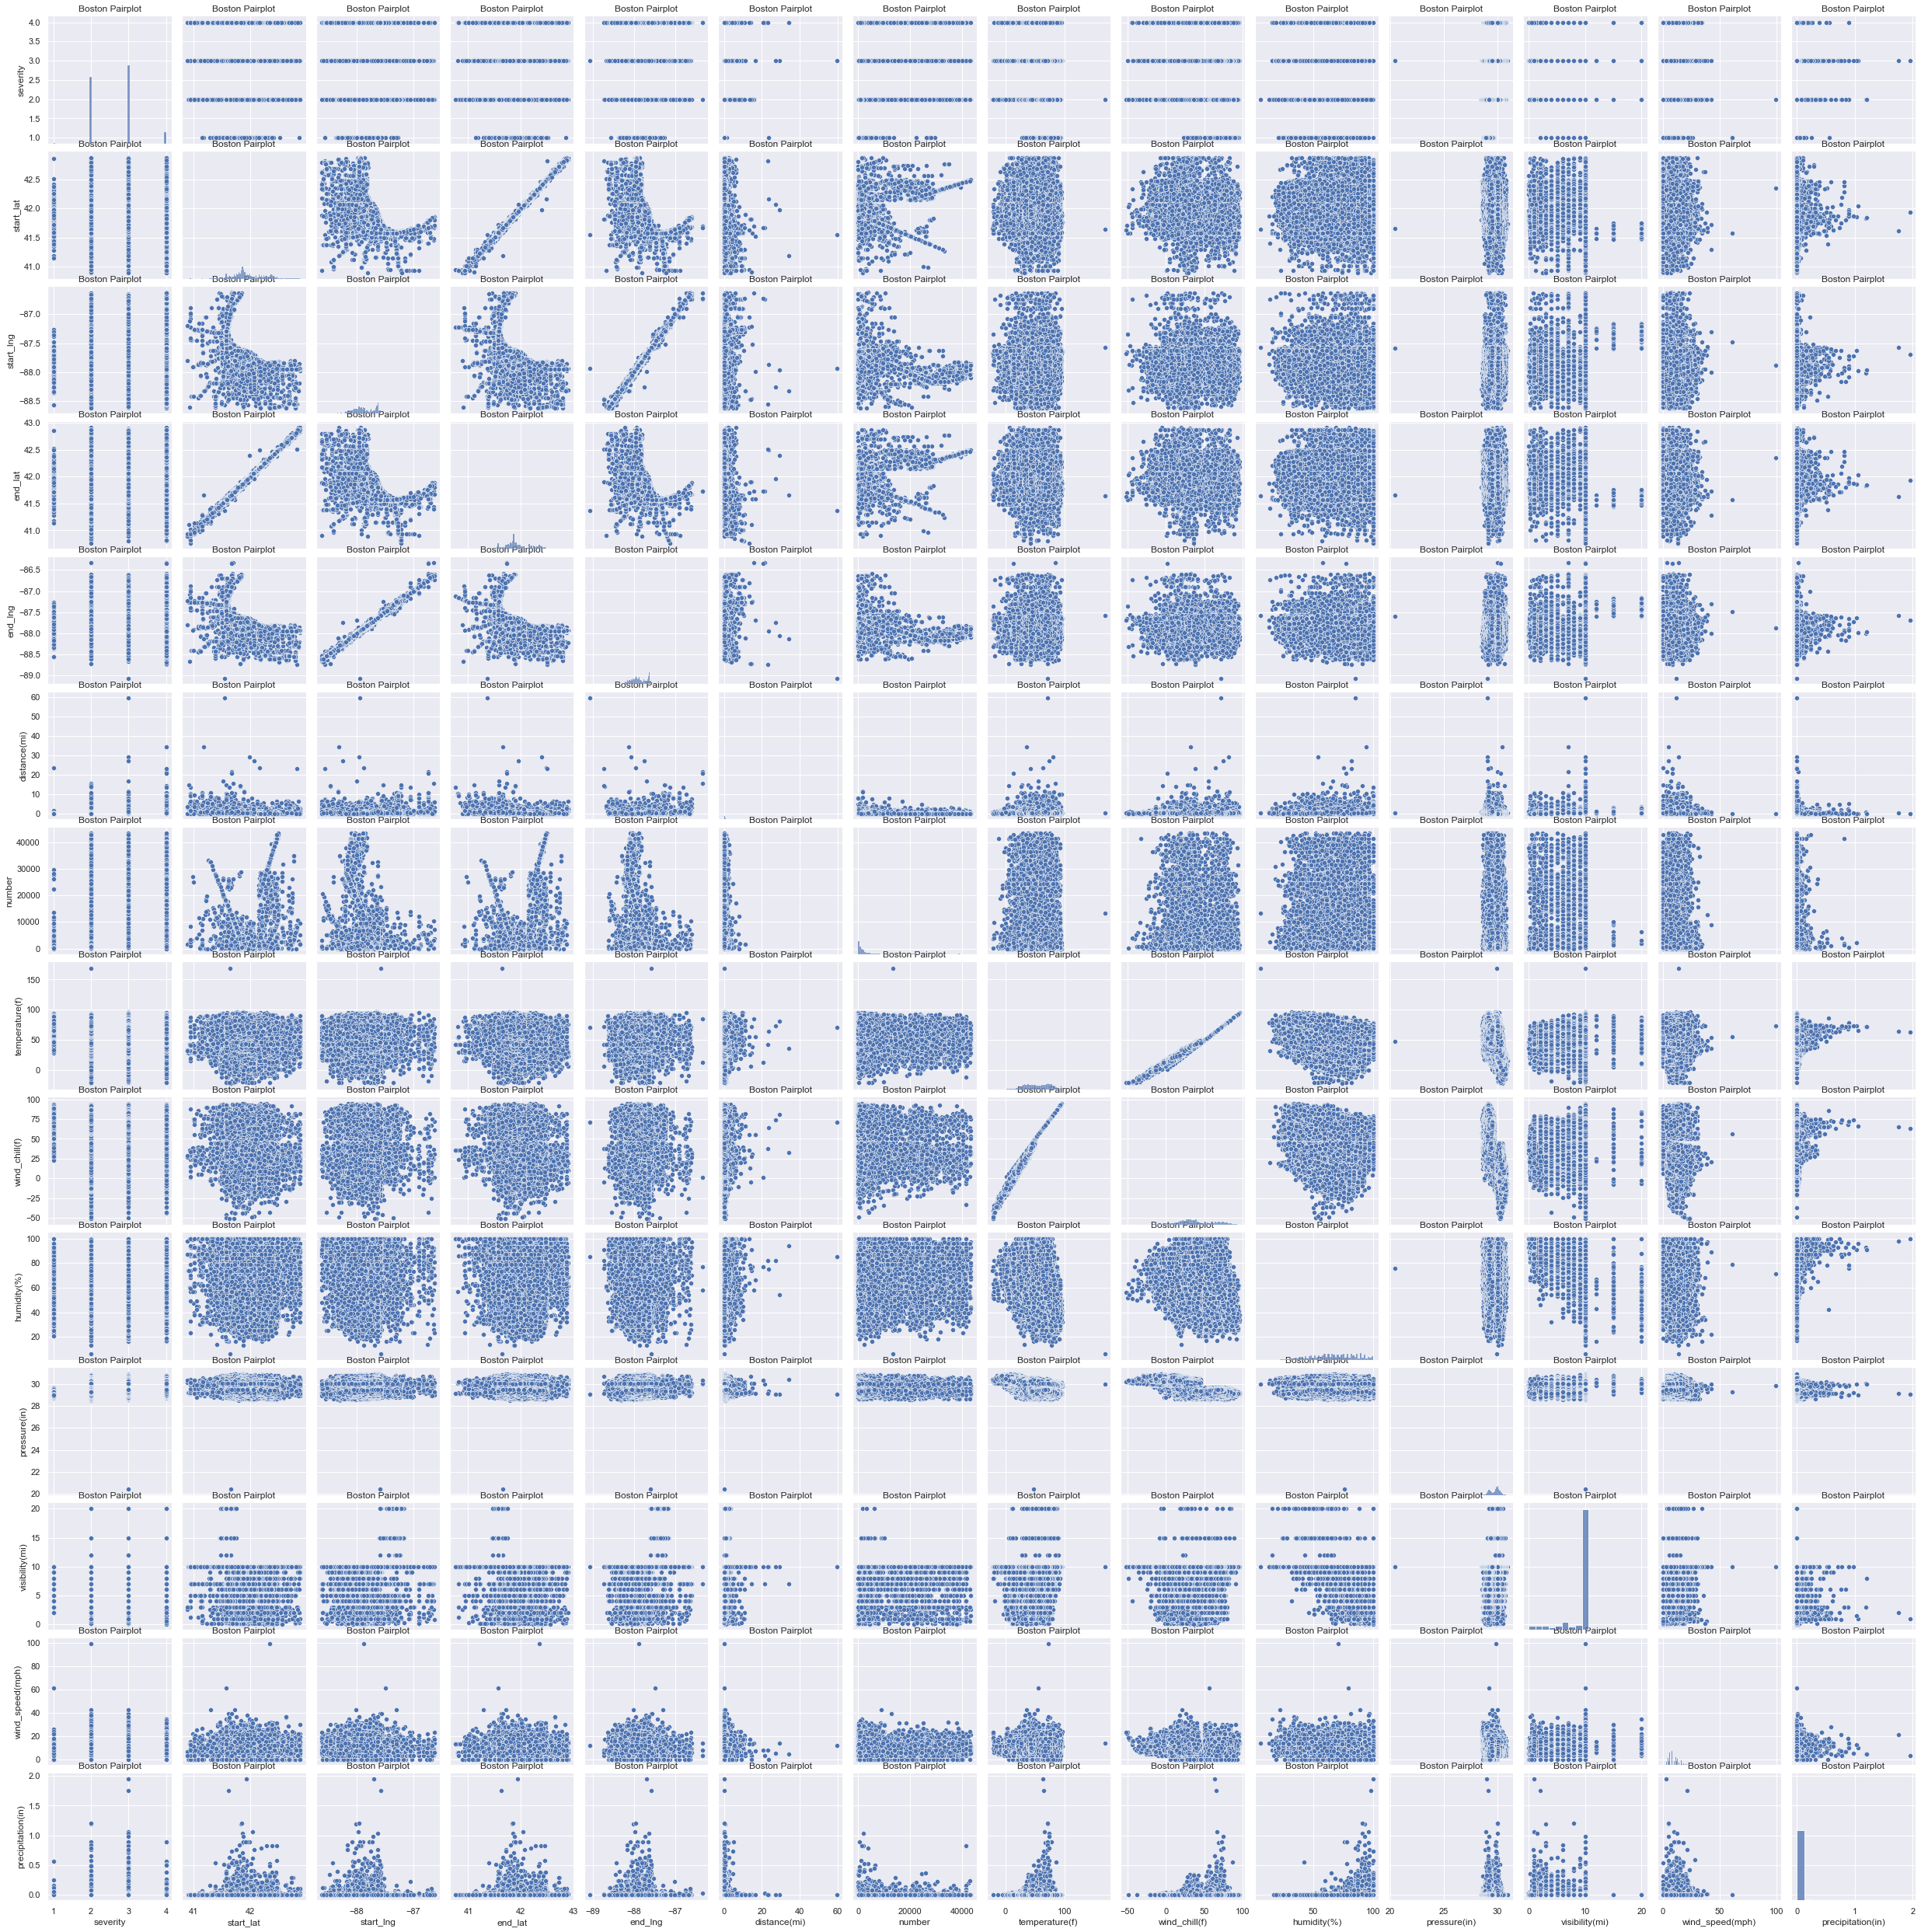

In [10]:
#pairplot for Denver
sns.pairplot(dia_df_og[['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)']]).set(title = 'Boston Pairplot');

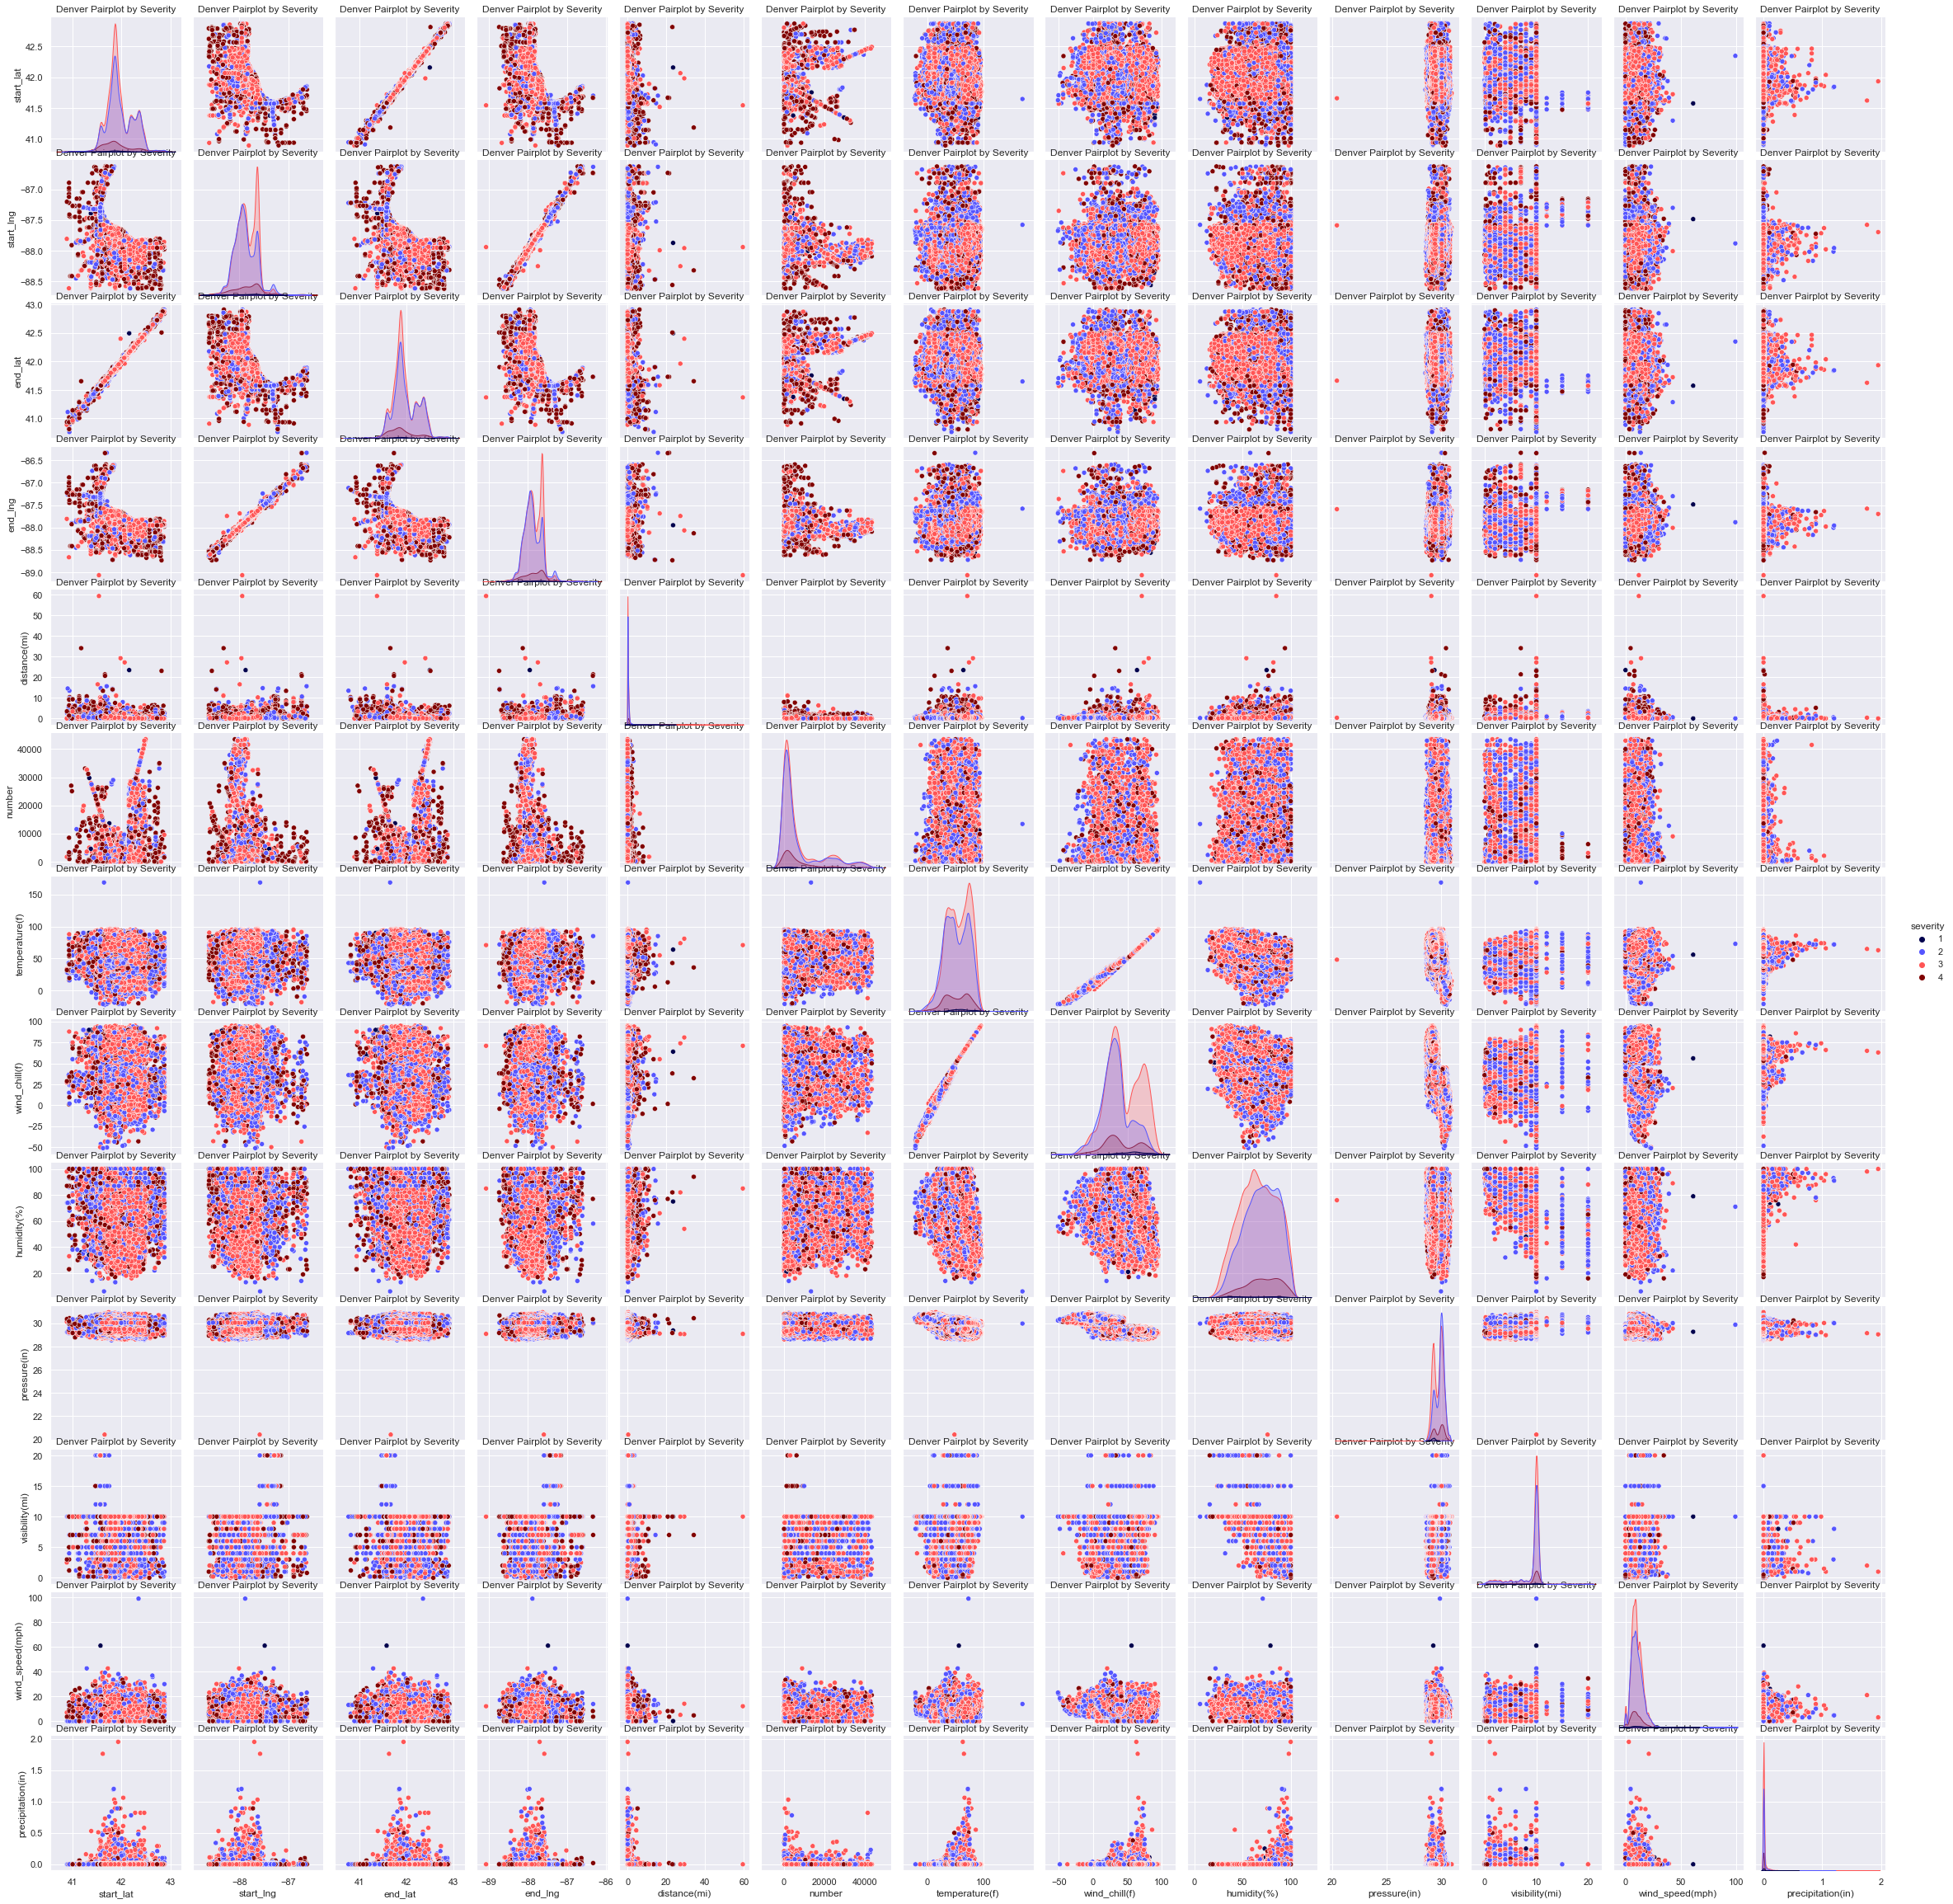

In [11]:
#pairplot for Denver, hued by Severity
sns.pairplot(dia_df_og[['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)']], hue = 'severity', palette = 'seismic').set(title= 'Denver Pairplot by Severity');

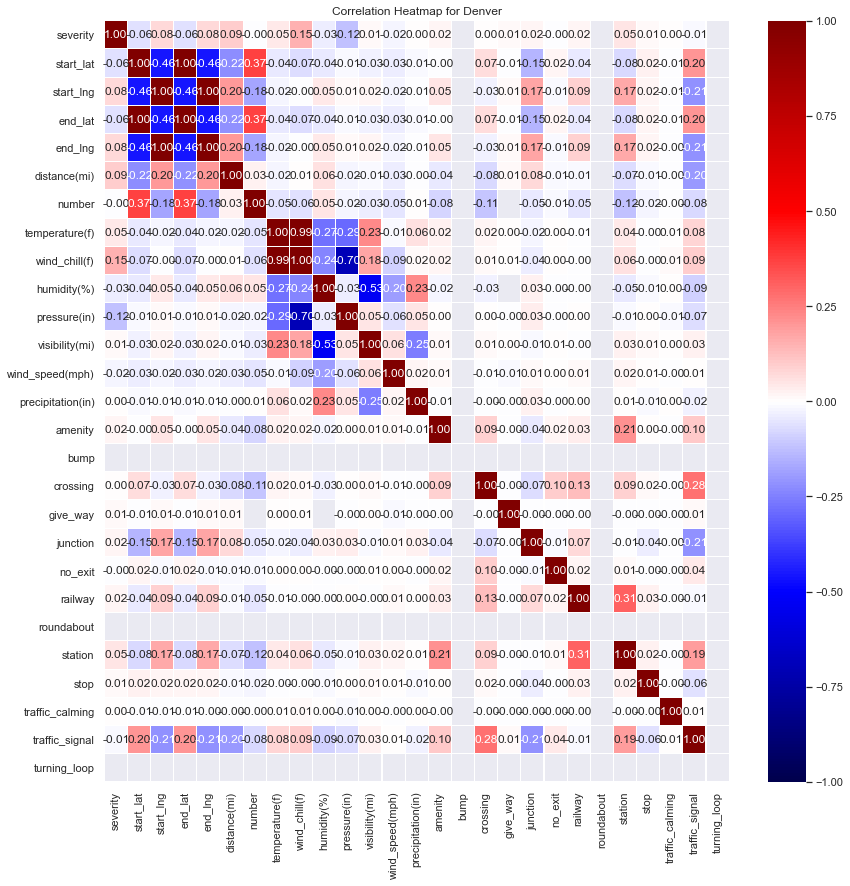

In [12]:
#corr heatmap for Denver
plt.figure(figsize = (14, 14))
sns.heatmap(dia_df_og.corr(),
            annot = True,
            fmt = '.2f',
            linewidth = .1,
            vmin = -1,
            vmax = 1,
            cmap = 'seismic')
plt.title('Correlation Heatmap for Denver');

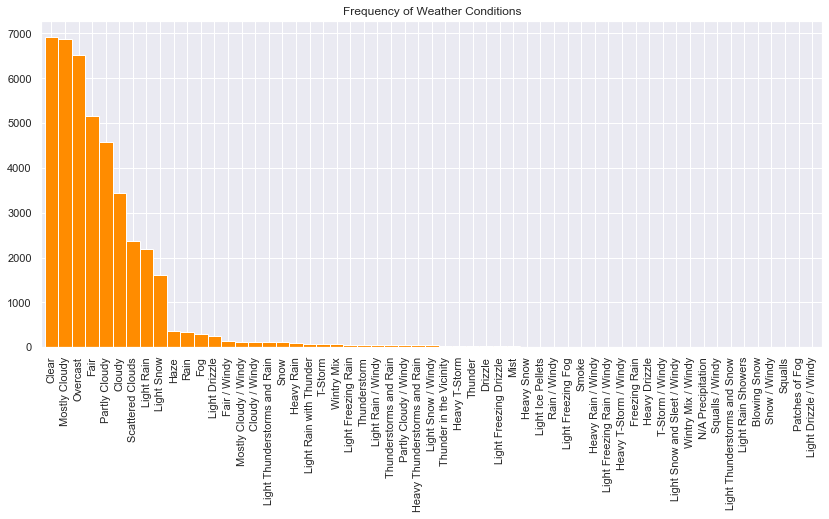

In [13]:
#bar plot of weather conditions for Denver
dia_df_og['weather_condition'].value_counts().plot(kind = 'bar',
                                                   figsize=(14, 6),
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Frequency of Weather Conditions');

In [14]:
#renaming certain wind_direction values
dia_df_og['wind_direction'].replace({
        'North': 'N',
        'South': 'S',
        'West' : 'W',
        'East' : 'E',
        'Calm' : 'CALM',
        'Variable': 'VAR'
    }, inplace = True)

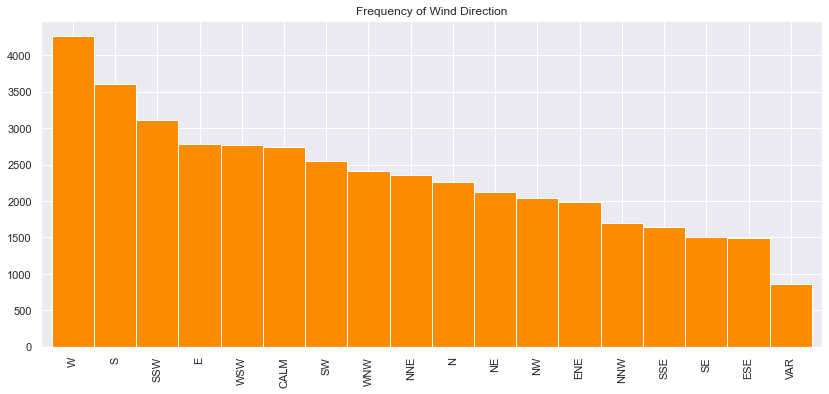

In [15]:
#bar plot of wind_direction for Denver
dia_df_og['wind_direction'].value_counts().plot(kind = 'bar',
                                                   figsize=(14, 6),
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Frequency of Wind Direction');

In [16]:
#taking note of earlist available value
dia_df_og['start_time'].sort_values()

7196               2016-06-17 14:40:56
7194               2016-06-17 14:42:18
7193               2016-06-17 14:45:04
7195               2016-06-17 14:47:49
7197               2016-06-17 14:47:49
                     ...              
17057              2020-12-31 21:22:00
14861              2020-12-31 21:22:00
16667    2020-12-31 21:22:00.000000000
16371              2020-12-31 22:07:22
16658              2020-12-31 22:07:22
Name: start_time, Length: 42472, dtype: object

**Exploring Cleaned Data**

In [17]:
dia_df.shape

(40974, 150)

In [18]:
#descriptive statistics for Denver
dia_df[['severity', 'start_time_ep', 'end_time_ep', 'weather_timestamp_ep', 
        'start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance(mi)', 
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)', 'accident_duration']].describe().drop('count').T

mean           std           min           25%  \
severity              2.649192e+00  6.225430e-01  1.000000e+00  2.000000e+00   
start_time_ep         1.531392e+09  4.411057e+07  1.466174e+09  1.489386e+09   
end_time_ep           1.531407e+09  4.410178e+07  1.466196e+09  1.489407e+09   
weather_timestamp_ep  1.531392e+09  4.411055e+07  1.466175e+09  1.489385e+09   
start_lat             4.195990e+01  2.682546e-01  4.088821e+01  4.179762e+01   
start_lng            -8.786151e+01  2.323141e-01 -8.862312e+01 -8.801885e+01   
end_lat               4.195995e+01  2.684129e-01  4.076210e+01  4.179862e+01   
end_lng              -8.786134e+01  2.327293e-01 -8.906718e+01 -8.801898e+01   
distance(mi)          3.509653e-01  8.422718e-01  0.000000e+00  0.000000e+00   
temperature(f)        5.303954e+01  2.123214e+01 -2.240000e+01  3.650000e+01   
wind_chill(f)         4.992993e+01  2.500837e+01 -5.130000e+01  3.030000e+01   
humidity(%)           6.743755e+01  1.847479e+01  6.000000e+00  5.400000e+01   
pressure(in)          2.977027e+01  4.384098e-01  2.041000e+01  2.937000e+01   
visibility(mi)        8.889359e+00  2.537189e+00  0.000000e+00  1.000000e+01   
wind_speed(mph)       9.995558e+00  4.829860e+00  0.000000e+00  6.900000e+00   
precipitation(in)     5.391224e-03  3.824892e-02  0.000000e+00  0.000000e+00   
accident_duration     1.417851e+04  8.494317e+04  8.080000e+02  1.780000e+03   

                               50%           75%           max  
severity              3.000000e+00  3.000000e+00  4.000000e+00  
start_time_ep         1.527679e+09  1.575620e+09  1.609452e+09  
end_time_ep           1.527701e+09  1.575621e+09  1.609458e+09  
weather_timestamp_ep  1.527679e+09  1.575621e+09  1.609452e+09  
start_lat             4.189260e+01  4.216155e+01  4.288156e+01  
start_lng            -8.788053e+01 -8.767468e+01 -8.662489e+01  
end_lat               4.189229e+01  4.216155e+01  4.291007e+01  
end_lng              -8.788024e+01 -8.767429e+01 -8.633062e+01  
distance(mi)          1.270000e-01  4.220000e-01  5.946600e+01  
temperature(f)        5.310000e+01  7.110000e+01  1.688000e+02  
wind_chill(f)         5.310000e+01  7.110000e+01  1.688000e+02  
humidity(%)           6.800000e+01  8.200000e+01  1.000000e+02  
pressure(in)          2.988000e+01  3.010000e+01  3.096000e+01  
visibility(mi)        1.000000e+01  1.000000e+01  2.000000e+01  
wind_speed(mph)       9.200000e+00  1.270000e+01  9.900000e+01  
precipitation(in)     0.000000e+00  0.000000e+00  1.950000e+00  
accident_duration     2.160000e+04  2.160000e+04  1.144740e+07

In [19]:
#a normalized value_count of accident severity
dia_df['severity'].value_counts(normalize = True).sort_index()

1    0.006077
2    0.412481
3    0.507615
4    0.073827
Name: severity, dtype: float64

**Exploring the frequency of accidents**

In [20]:
#function to generate count plots
def make_countplot(dataframe,
                   x, y = None,
                   hue = None,
                   palette = None):
    
    return sns.countplot(data = dataframe,
                         x = x,
                         hue = hue,
                         palette = palette)

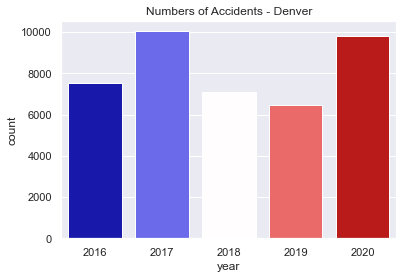

In [21]:
#Overall number of Accidents - Denver
make_countplot(dia_df, 'year', palette = 'seismic')
plt.title('Numbers of Accidents - Denver')
plt.show();

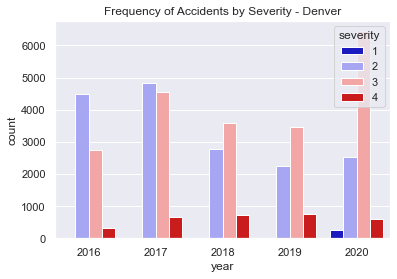

In [22]:
#Frequency of Accidents by Sev. for Denver
make_countplot(dia_df, x = 'year', hue = 'severity', palette = 'seismic')
plt.title('Frequency of Accidents by Severity - Denver')
plt.show();

#are '1' severity accidents under reported?
#remember severity is: a number between 1 and 4,
#where 1 indicates the least impact on traffic 
#(i.e., short delay as a result of the accident) and
#4 indicates a significant impact on traffic (i.e., long delay).	

In [23]:
#function to generate histplots
def make_histplot(dataframe, x, y = None, color = None, kde = True):
    sns.histplot(data = dataframe, x = x, y = y, color = color, kde = kde)
    plt.title('Frequency of Accidents by Week')
    return plt.show()

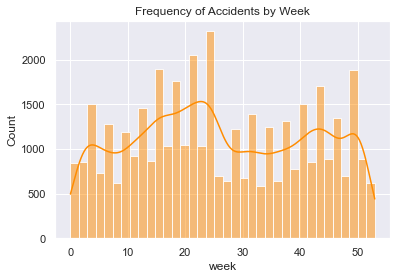

In [24]:
make_histplot(dia_df, x = 'week', color = 'darkorange')
#could the drop around weeks 27, 28 be attributed to the 4th of July holiday?

In [25]:
#function to generate kdeplots
def make_kdeplot(dataframe,
                 shade = True,
                 color = None):
    
    return sns.kdeplot(data = dataframe,
                shade = shade,
                color = color);

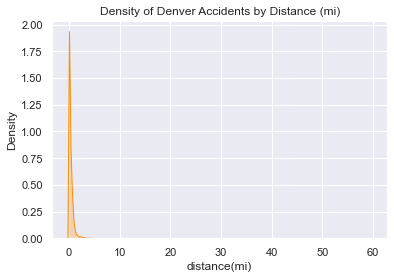

In [26]:
#kde plot for Denver's distance
make_kdeplot(dia_df['distance(mi)'], color = 'darkorange')
plt.title('Density of Denver Accidents by Distance (mi)')
plt.show()

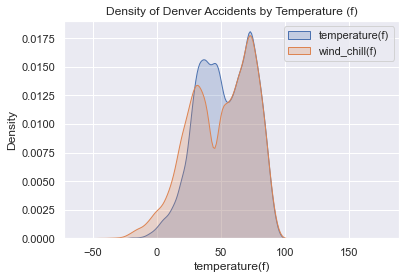

In [27]:
#Looking at weather variables for Denver

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables
fig = make_kdeplot(dia_df['temperature(f)'], shade = True)
fig = make_kdeplot(dia_df['wind_chill(f)'], shade = True)
plt.title('Density of Denver Accidents by Temperature (f)')
plt.legend(labels = ['temperature(f)', 'wind_chill(f)'])
plt.show()

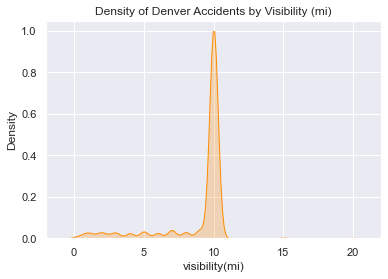

In [28]:
#kde plot for Denver's visbility distance
make_kdeplot(dia_df['visibility(mi)'], color = 'darkorange')
plt.title('Density of Denver Accidents by Visibility (mi)')
plt.show()

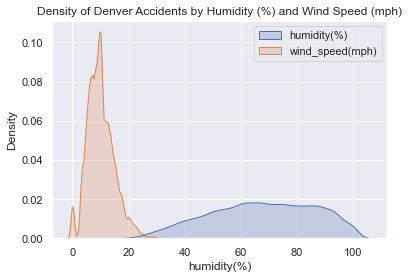

In [29]:
#combined kde plots for Denver's humidity(%), and wind_speed(mph)
fig = make_kdeplot(dia_df['humidity(%)'])
fig = make_kdeplot(dia_df['wind_speed(mph)'])
plt.title('Density of Denver Accidents by Humidity (%) and Wind Speed (mph)')
plt.legend(labels = ['humidity(%)', 'wind_speed(mph)'])
plt.show()

**Trying to Plot the 'Shape' of the Cities**

In [30]:
#https://matplotlib.org/3.3.0/gallery/text_labels_and_annotations/titles_demo.html

#function to generate jointplots
def make_jointplot(x, y,
                   kind = 'kde',
                   fill = True, 
                   color = None):
    
    return sns.jointplot(x = x, y = y,
                         kind = kind,
                         fill = fill,
                         color = color)

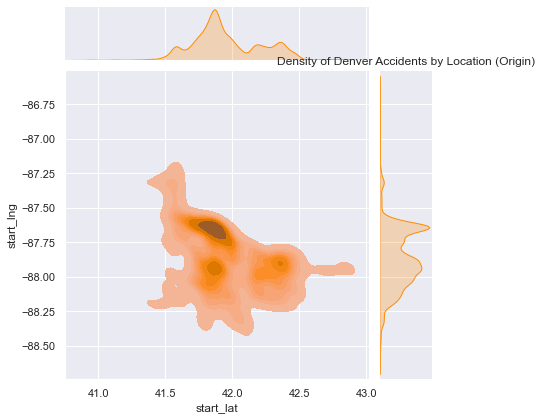

In [31]:
#Density of Denver's accidents
make_jointplot(x = dia_df["start_lat"], 
               y = dia_df["start_lng"], 
               kind ='kde', 
               fill = True, 
               color = 'darkorange')
plt.title('Density of Denver Accidents by Location (Origin)')
plt.show()

In [32]:
#function to generate jointplots - hex kind
def make_jointplothex(x, y,
                   kind = 'hex',
                   color = None):
    
    return sns.jointplot(x = x, y = y,
                         kind = kind,
                         color = color)

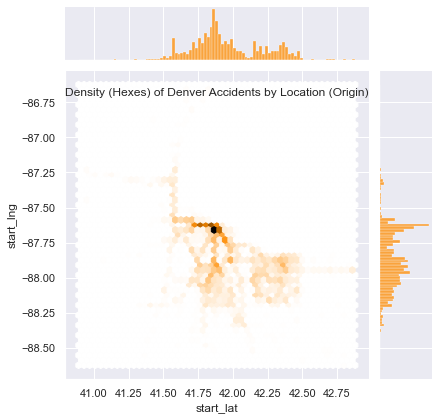

In [33]:
#Density of Denver's accidents - hexes
make_jointplothex(x = dia_df["start_lat"],
                  y = dia_df["start_lng"],
                  kind = 'hex', 
                  color = 'darkorange')
plt.title('Density (Hexes) of Denver Accidents by Location (Origin)', 
          y = 0.9)
plt.show();

In [34]:
#function to generate scatterplots
def make_scatterplot(x, y, s, alpha):
    #setting figure size
    plt.figure(figsize=(10, 10))
    
    #setting x and y labels
    plt.xlabel('Starting Latitude')
    plt.ylabel('Starting Longitude')
    
    #making plot
    return plt.scatter(x = x,
                       y = y,
                       s = s,
                       alpha = 0.5)

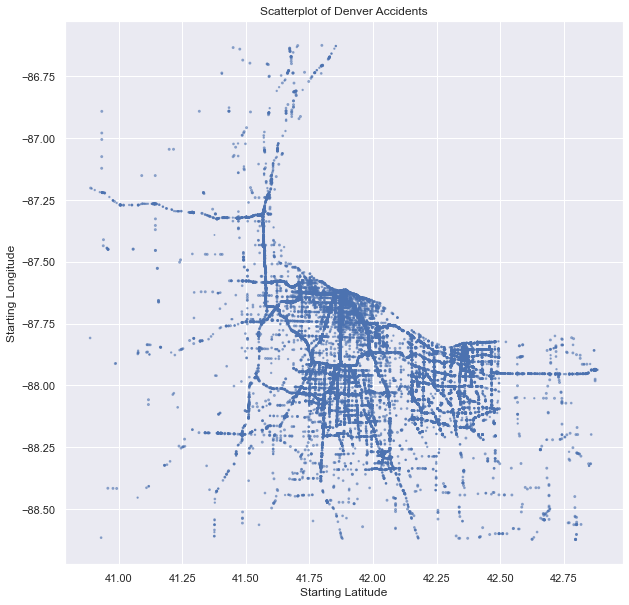

In [35]:
#scatterplot of Denver
make_scatterplot(x = dia_df['start_lat'],
                 y = dia_df['start_lng'],
                 s = dia_df['severity'],
                 alpha = 0.5)
plt.title('Scatterplot of Denver Accidents');

In [36]:
#function to generate hued scatterplots
def make_hued_scatterplot(x, y, c, cmap, alpha):
    #setting figure size:
    plt.figure(figsize=(10, 10))
    
    #setting x and y labels:
    plt.xlabel('Starting Latitude')
    plt.ylabel('Starting Longitude')
    
    #making plot:
    scatter = plt.scatter(x = x,
                          y = y,
                          c = c,
                          cmap = cmap,
                          alpha = 0.5)
    
    #setting legend:
    plt.legend(handles = scatter.legend_elements()[0], labels = [1, 2, 3, 4])
    
    #making plot
    return scatter

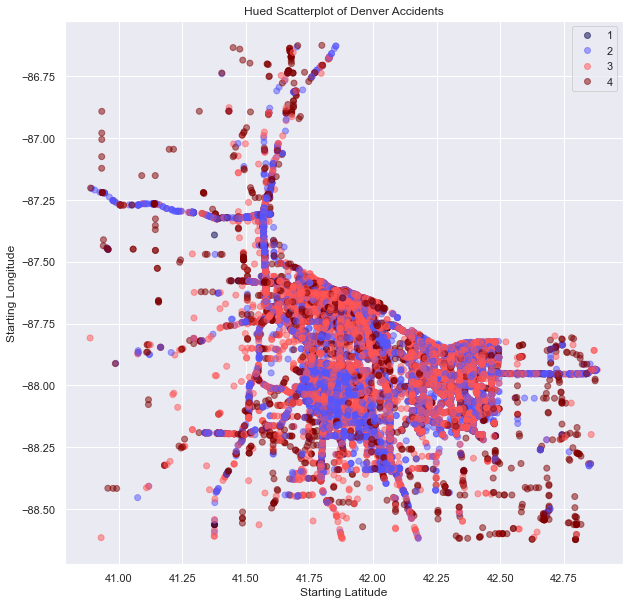

In [37]:
make_hued_scatterplot(x = dia_df['start_lat'],
                      y = dia_df['start_lng'],
                      c = dia_df['severity'],
                      cmap = 'seismic',
                      alpha = 0.5)
plt.title('Hued Scatterplot of Denver Accidents');

**Exploring Time Intervals**

- For Frame of Reference

| Human-readable Time |      Seconds      |
|----------|:-------------:|
| 1 hour | 3600 seconds |
| 1 day | 86400 seconds |
| 1 week | 604800 seconds |
| 1 month (30.44 days) | 2629743 seconds |
| 1 hour (365.24 days) | 31556926 seconds |

source: https://www.epochconverter.com/

In [38]:
dia_df_time_convert = pd.to_datetime(dia_df['start_time_ep'], unit = 's')
dia_df_time_convert = pd.DataFrame(dia_df_time_convert)
dia_df_time_convert.head(3)

start_time_ep
0 2016-11-30 14:46:48
1 2016-11-30 14:58:59
2 2016-11-30 15:14:24

In [39]:
dia_df_time_convert.rename(columns = {'start_time_ep': 'start_time'}, inplace = True)
dia_df_time_convert.head()

start_time
0 2016-11-30 14:46:48
1 2016-11-30 14:58:59
2 2016-11-30 15:14:24
3 2016-11-30 16:13:53
4 2016-11-30 16:33:05

In [40]:
dia_df_time_convert = dia_df_time_convert.sort_values('start_time')
dia_df_time_convert.head()

start_time
7047 2016-06-17 14:40:56
7045 2016-06-17 14:42:18
7044 2016-06-17 14:45:04
7046 2016-06-17 14:47:49
7048 2016-06-17 14:47:49

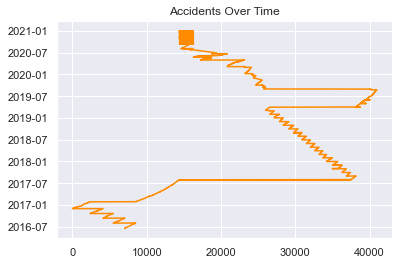

In [41]:
#https://www.python-graph-gallery.com/242-area-chart-and-faceting
plt.plot(dia_df_time_convert, color = 'darkorange')
plt.title("Accidents Over Time");

In [42]:
dia_df.columns[0:35]

Index(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance(mi)', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_speed(mph)',
       'precipitation(in)', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'turning_loop', 'start_time_ep',
       'end_time_ep', 'weather_timestamp_ep', 'year', 'month', 'week',
       'accident_duration', 'side_L', 'side_R'],
      dtype='object')

In [43]:
#trying to pinpoint the 'average' accident severity and location:
mean_accident_loc = dia_df[['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng']].mean()
loc_dict = dict(mean_accident_loc)
loc_dict

{'severity': 2.649192170644799,
 'start_lat': 41.95989841897385,
 'start_lng': -87.86150936083946,
 'end_lat': 41.95995016124734,
 'end_lng': -87.86133772533927}

In [44]:
print(loc_dict.keys())
print(loc_dict.values())

dict_keys(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])
dict_values([2.649192170644799, 41.95989841897385, -87.86150936083946, 41.95995016124734, -87.86133772533927])


**Looking At Individual Years, Months, and Days of DST**

In [45]:
dia_2016 = dia_df.loc[dia_df['year'] == 2016]
dia_2017 = dia_df.loc[dia_df['year'] == 2017]
dia_2018 = dia_df.loc[dia_df['year'] == 2018]
dia_2019 = dia_df.loc[dia_df['year'] == 2019]
dia_2020 = dia_df.loc[dia_df['year'] == 2020]

In [46]:
print(dia_2016.shape[0])
print(dia_2017.shape[0])
print(dia_2018.shape[0])
print(dia_2019.shape[0])
print(dia_2020.shape[0])

7551
10037
7088
6483
9815


In [47]:
dia_2016.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
0         2  42.305960 -87.960150  42.306916 -87.960918         0.077   
1         2  42.175870 -88.135770  42.174620 -88.135794         0.086   
2         3  42.175897 -88.135769  42.174612 -88.135794         0.089   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            37.0           31.0         79.0         29.59            10.0   
1            37.0           28.1         76.0         29.62            10.0   
2            37.0           28.1         76.0         29.62            10.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              8.1                0.0        0     0         0         0   
1             15.0                0.0        0     0         0         0   
2             15.0                0.0        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         0        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  start_time_ep   end_time_ep  \
0               1             0   1.480517e+09  1.480539e+09   
1               1             0   1.480518e+09  1.480540e+09   
2               1             0   1.480519e+09  1.480541e+09   

   weather_timestamp_ep  year  month  week  accident_duration  side_L  side_R  \
0          1.480518e+09  2016     11    48            21600.0       0       1   
1          1.480518e+09  2016     11    48            21600.0       1       0   
2          1.480518e+09  2016     11    48            22524.0       0       1   

   wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   

   wind_direction_ESE  wind_direction_N  wind_direction_NE  \
0                   0                 0                  0   
1                   0                 0                  0   
2                   0                 0                  0   

   wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   

   wind_direction_S  wind_direction_SE  wind_direction_SSE  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   

   wind_direction_SSW  wind_direction_SW  wind_direction_VAR  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   

   wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
0                 1                   0                   0   
1                 1                   0                   0   
2                 1                   0                   0   

   weather_condition_Blowing Snow  weather_condition_Clear  \
0                               0                        0   
1                               0                        0   
2                               0                        0   

   weather_condition_Cloudy  weather_condition_Cloudy / Windy  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   

   weather_condition_Drizzle  weather_condition_Fair  \
0                          0                       0   
1                          0                       0 

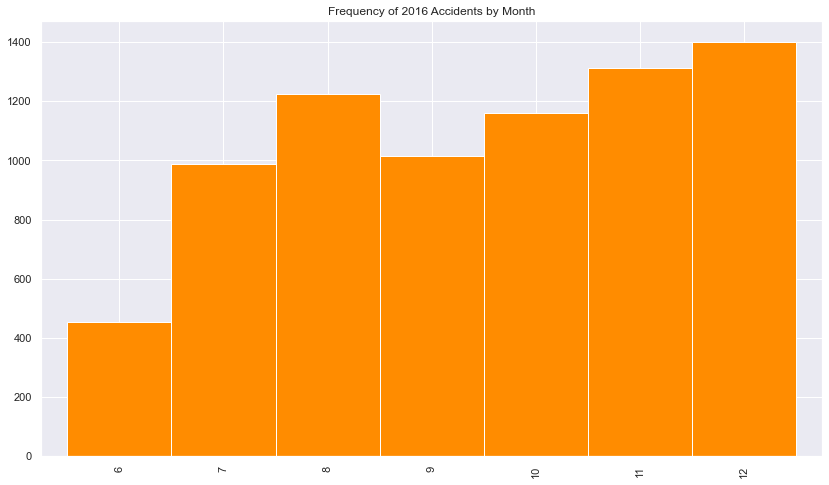

In [48]:
#bar plot of 2016 accident frequencies
dia_2016['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize=(14, 8),
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Frequency of 2016 Accidents by Month');

In [49]:
dia_2017.head(3)

severity  start_lat  start_lng    end_lat   end_lng  distance(mi)  \
1413         3  41.871010  -87.76894  41.874150 -87.80818         2.030   
1414         3  41.753837  -87.94486  41.753401 -87.94485         0.030   
1415         3  41.753345  -87.94458  41.753832 -87.94459         0.034   

      temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  \
1413            25.0           19.3         78.0         30.07   
1414            39.0           32.8         89.0         29.96   
1415            39.0           32.8         89.0         29.96   

      visibility(mi)  wind_speed(mph)  precipitation(in)  amenity  bump  \
1413            10.0              4.6               0.00        0     0   
1414             1.5              9.2               0.01        0     0   
1415             1.5              9.2               0.01        0     0   

      crossing  give_way  junction  no_exit  railway  roundabout  station  \
1413         0         0         0        0        0           0        0   
1414         0         0         0        0        0           0        0   
1415         0         0         0        0        0           0        0   

      stop  traffic_calming  traffic_signal  turning_loop  start_time_ep  \
1413     0                0               0             0   1.483238e+09   
1414     0                0               0             0   1.483374e+09   
1415     0                0               0             0   1.483374e+09   

       end_time_ep  weather_timestamp_ep  year  month  week  \
1413  1.483259e+09          1.483239e+09  2017      1     1   
1414  1.483396e+09          1.483374e+09  2017      1     1   
1415  1.483396e+09          1.483374e+09  2017      1     1   

      accident_duration  side_L  side_R  wind_direction_CALM  \
1413            21600.0       0       1                    0   
1414            21600.0       1       0                    0   
1415            21600.0       1       0                    0   

      wind_direction_E  wind_direction_ENE  wind_direction_ESE  \
1413                 0                   0                   0   
1414                 1                   0                   0   
1415                 1                   0                   0   

      wind_direction_N  wind_direction_NE  wind_direction_NNE  \
1413                 0                  0                   0   
1414                 0                  0                   0   
1415                 0                  0                   0   

      wind_direction_NNW  wind_direction_NW  wind_direction_S  \
1413                   0                  0                 0   
1414                   0                  0                 0   
1415                   0                  0                 0   

      wind_direction_SE  wind_direction_SSE  wind_direction_SSW  \
1413                  0                   0                   1   
1414                  0                   0                   0   
1415                  0                   0                   0   

      wind_direction_SW  wind_direction_VAR  wind_direction_W  \
1413                  0                   0                 0   
1414                  0                   0                 0   
1415                  0                   0                 0   

      wind_direction_WNW  wind_direction_WSW  weather_condition_Blowing Snow  \
1413                   0                   0                               0   
1414                   0                   0                               0   
1415                   0                   0                               0   

      weather_condition_Clear  weather_condition_Cloudy  \
1413                        1                         0   
1414                        0                         0   
1415                        0                         0   

      weather_condition_Cloudy / Windy  weather_condition_Drizzle  \
1413                                 0                          0   
14

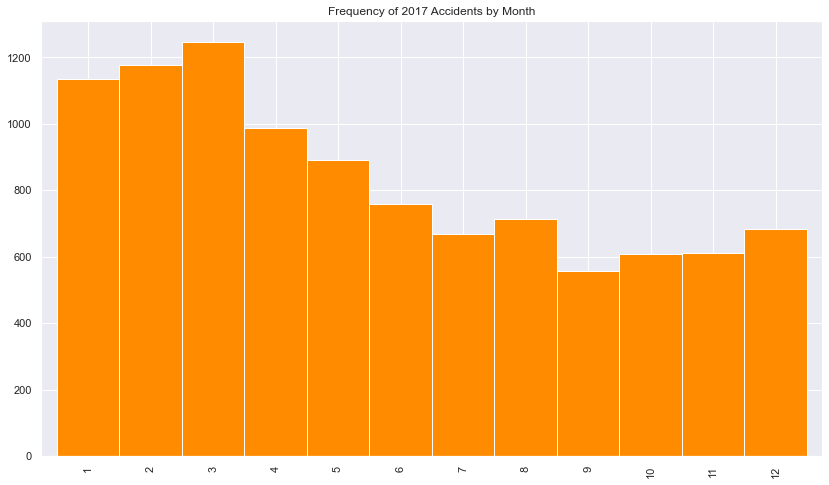

In [50]:
#bar plot of 2017 accident frequencies
dia_2017['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize=(14, 8),
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Frequency of 2017 Accidents by Month');

In [51]:
dia_2018.head(3)

severity  start_lat  start_lng   end_lat   end_lng  distance(mi)  \
27875         3   41.57114  -87.43828  41.56983 -87.41798         1.053   
27876         2   41.93763  -88.03780  41.92605 -88.03793         0.800   
27877         2   41.94658  -87.71148  41.94658 -87.71148         0.000   

       temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  \
27875            41.0           39.0         81.0         30.05   
27876            28.9           22.8         85.0         29.97   
27877            28.9           25.2         82.0         30.01   

       visibility(mi)  wind_speed(mph)  precipitation(in)  amenity  bump  \
27875             4.0              3.5                0.0        0     0   
27876             6.0              5.8                0.0        0     0   
27877             7.0              3.5                0.0        0     0   

       crossing  give_way  junction  no_exit  railway  roundabout  station  \
27875         0         0         0        0        0           0        0   
27876         0         0         1        0        0           0        0   
27877         0         0         0        0        0           0        0   

       stop  traffic_calming  traffic_signal  turning_loop  start_time_ep  \
27875     0                0               0             0   1.543594e+09   
27876     0                0               0             0   1.543557e+09   
27877     0                0               0             0   1.543563e+09   

        end_time_ep  weather_timestamp_ep  year  month  week  \
27875  1.543596e+09          1.543593e+09  2018     11    47   
27876  1.543558e+09          1.543557e+09  2018     11    47   
27877  1.543565e+09          1.543564e+09  2018     11    47   

       accident_duration  side_L  side_R  wind_direction_CALM  \
27875             1784.0       0       1                    0   
27876             1773.0       0       1                    0   
27877             1761.0       1       0                    0   

       wind_direction_E  wind_direction_ENE  wind_direction_ESE  \
27875                 0                   0                   0   
27876                 0                   0                   0   
27877                 0                   0                   0   

       wind_direction_N  wind_direction_NE  wind_direction_NNE  \
27875                 0                  0                   0   
27876                 1                  0                   0   
27877                 1                  0                   0   

       wind_direction_NNW  wind_direction_NW  wind_direction_S  \
27875                   0                  0                 0   
27876                   0                  0                 0   
27877                   0                  0                 0   

       wind_direction_SE  wind_direction_SSE  wind_direction_SSW  \
27875                  0                   0                   0   
27876                  0                   0                   0   
27877                  0                   0                   0   

       wind_direction_SW  wind_direction_VAR  wind_direction_W  \
27875                  0                   1                 0   
27876                  0                   0                 0   
27877                  0                   0                 0   

       wind_direction_WNW  wind_direction_WSW  weather_condition_Blowing Snow  \
27875                   0                   0                               0   
27876                   0                   0                               0   
27877                   0                   0                               0   

       weather_condition_Clear  weather_condition_Cloudy  \
27875                        0                         0   
27876                        0                         0   
27877                        0                         0   

       weather_condition_Cloudy / Windy  weather_condition_Drizzle  \
27875              

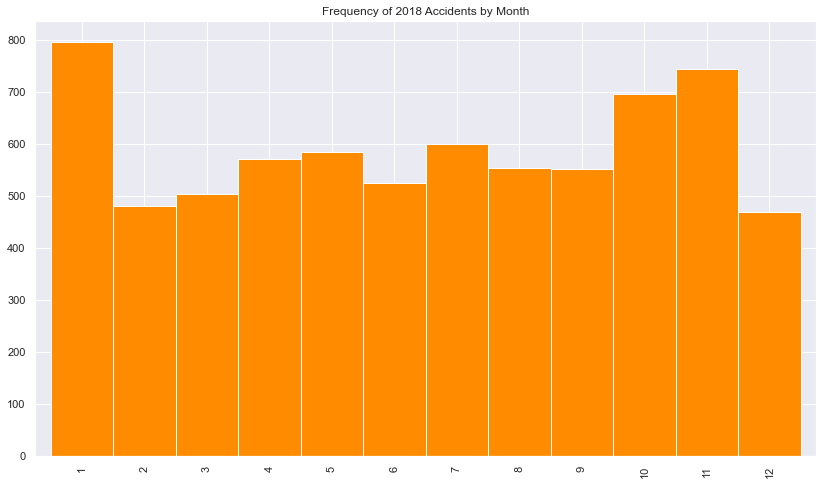

In [52]:
#bar plot of 2018 accident frequencies
dia_2018['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize=(14, 8),
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Frequency of 2018 Accidents by Month');

In [53]:
dia_2019.head(3)

severity  start_lat  start_lng   end_lat   end_lng  distance(mi)  \
24110         3   41.87248  -87.64574  41.87036 -87.64508         0.150   
24111         3   41.87561  -87.64155  41.87571 -87.64355         0.103   
24112         3   41.90150  -87.92034  41.90963 -87.93019         0.756   

       temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  \
24110            27.0           19.0         81.0         29.15   
24111            27.0           19.0         81.0         29.15   
24112            25.0           16.0         85.0         29.08   

       visibility(mi)  wind_speed(mph)  precipitation(in)  amenity  bump  \
24110            10.0              8.0                0.0        0     0   
24111            10.0              8.0                0.0        0     0   
24112            10.0              8.0                0.0        0     0   

       crossing  give_way  junction  no_exit  railway  roundabout  station  \
24110         0         0         0        0        0           0        0   
24111         0         0         1        0        0           0        0   
24112         0         0         1        0        0           0        0   

       stop  traffic_calming  traffic_signal  turning_loop  start_time_ep  \
24110     0                0               0             0   1.577837e+09   
24111     0                0               0             0   1.577837e+09   
24112     0                0               0             0   1.577837e+09   

        end_time_ep  weather_timestamp_ep  year  month  week  \
24110  1.577838e+09          1.577836e+09  2019     12    52   
24111  1.577838e+09          1.577836e+09  2019     12    52   
24112  1.577838e+09          1.577836e+09  2019     12    52   

       accident_duration  side_L  side_R  wind_direction_CALM  \
24110             1726.0       0       1                    0   
24111             1726.0       0       1                    0   
24112             1726.0       0       1                    0   

       wind_direction_E  wind_direction_ENE  wind_direction_ESE  \
24110                 0                   0                   0   
24111                 0                   0                   0   
24112                 0                   0                   0   

       wind_direction_N  wind_direction_NE  wind_direction_NNE  \
24110                 0                  0                   0   
24111                 0                  0                   0   
24112                 0                  0                   0   

       wind_direction_NNW  wind_direction_NW  wind_direction_S  \
24110                   0                  0                 0   
24111                   0                  0                 0   
24112                   0                  0                 0   

       wind_direction_SE  wind_direction_SSE  wind_direction_SSW  \
24110                  0                   0                   0   
24111                  0                   0                   0   
24112                  0                   0                   0   

       wind_direction_SW  wind_direction_VAR  wind_direction_W  \
24110                  0                   0                 1   
24111                  0                   0                 1   
24112                  0                   0                 1   

       wind_direction_WNW  wind_direction_WSW  weather_condition_Blowing Snow  \
24110                   0                   0                               0   
24111                   0                   0                               0   
24112                   0                   0                               0   

       weather_condition_Clear  weather_condition_Cloudy  \
24110                        0                         0   
24111                        0                         0   
24112                        0                         0   

       weather_condition_Cloudy / Windy  weather_condition_Drizzle  \
24110              

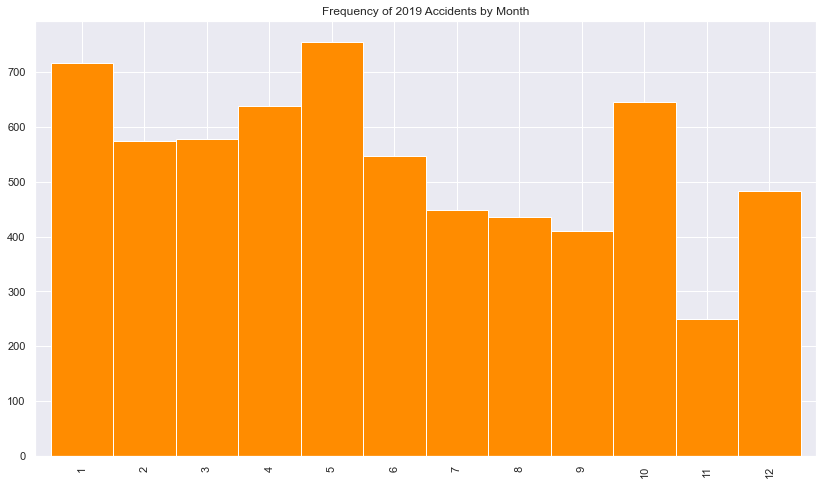

In [54]:
#bar plot of 2019 accident frequencies
dia_2019['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize=(14, 8),
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Frequency of 2019 Accidents by Month');

In [55]:
dia_2020.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
14392         2  42.207312 -87.811845  42.208289 -87.812422         0.074   
14393         2  42.363555 -87.929838  42.363601 -87.929777         0.004   
14394         2  42.170064 -88.020662  42.170132 -88.018971         0.087   

       temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  \
14392            40.0           34.0         41.0         29.57   
14393            31.0           24.0         69.0         29.08   
14394            32.0           27.0         59.0         29.48   

       visibility(mi)  wind_speed(mph)  precipitation(in)  amenity  bump  \
14392            10.0              8.0                0.0        0     0   
14393            10.0              7.0                0.0        0     0   
14394            10.0              5.0                0.0        0     0   

       crossing  give_way  junction  no_exit  railway  roundabout  station  \
14392         0         0         0        0        0           0        0   
14393         1         0         0        0        0           0        0   
14394         0         0         0        0        0           0        0   

       stop  traffic_calming  traffic_signal  turning_loop  start_time_ep  \
14392     0                0               0             0   1.606935e+09   
14393     0                0               1             0   1.609338e+09   
14394     0                0               0             0   1.606963e+09   

        end_time_ep  weather_timestamp_ep  year  month  week  \
14392  1.606941e+09          1.606935e+09  2020     12    48   
14393  1.609344e+09          1.609336e+09  2020     12    52   
14394  1.606969e+09          1.606964e+09  2020     12    48   

       accident_duration  side_L  side_R  wind_direction_CALM  \
14392             6032.0       0       1                    0   
14393             6006.0       0       1                    0   
14394             6250.0       0       1                    0   

       wind_direction_E  wind_direction_ENE  wind_direction_ESE  \
14392                 0                   0                   0   
14393                 0                   0                   0   
14394                 0                   0                   0   

       wind_direction_N  wind_direction_NE  wind_direction_NNE  \
14392                 0                  0                   0   
14393                 0                  0                   0   
14394                 0                  0                   0   

       wind_direction_NNW  wind_direction_NW  wind_direction_S  \
14392                   0                  0                 0   
14393                   0                  0                 0   
14394                   0                  0                 0   

       wind_direction_SE  wind_direction_SSE  wind_direction_SSW  \
14392                  0                   0                   0   
14393                  0                   0                   0   
14394                  0                   0                   0   

       wind_direction_SW  wind_direction_VAR  wind_direction_W  \
14392                  0                   0                 0   
14393                  0                   1                 0   
14394                  1                   0                 0   

       wind_direction_WNW  wind_direction_WSW  weather_condition_Blowing Snow  \
14392                   0                   1                               0   
14393                   0                   0                               0   
14394                   0                   0                               0   

       weather_condition_Clear  weather_condition_Cloudy  \
14392                        0                         0   
14393                        0                         1   
14394                        0                         0   

       weather_condition_Cloudy / Windy  weather_condition_Drizzle  \
14392      

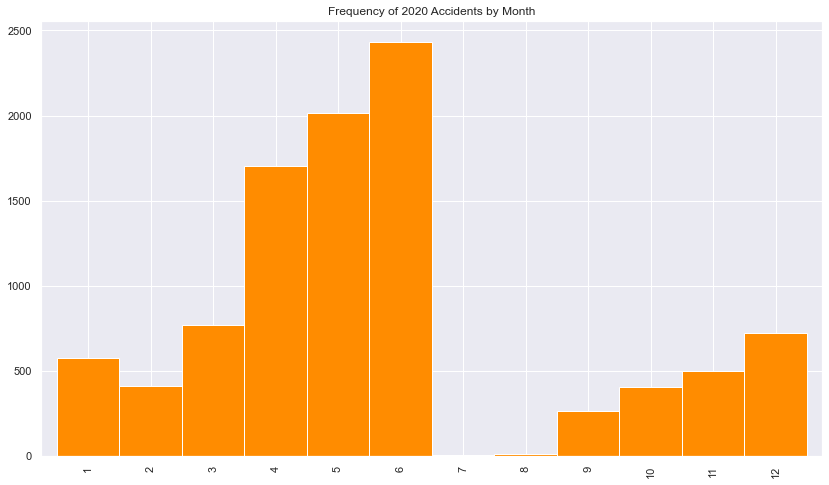

In [56]:
#bar plot of 2020 accident frequencies
dia_2020['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize=(14, 8),
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Frequency of 2020 Accidents by Month');

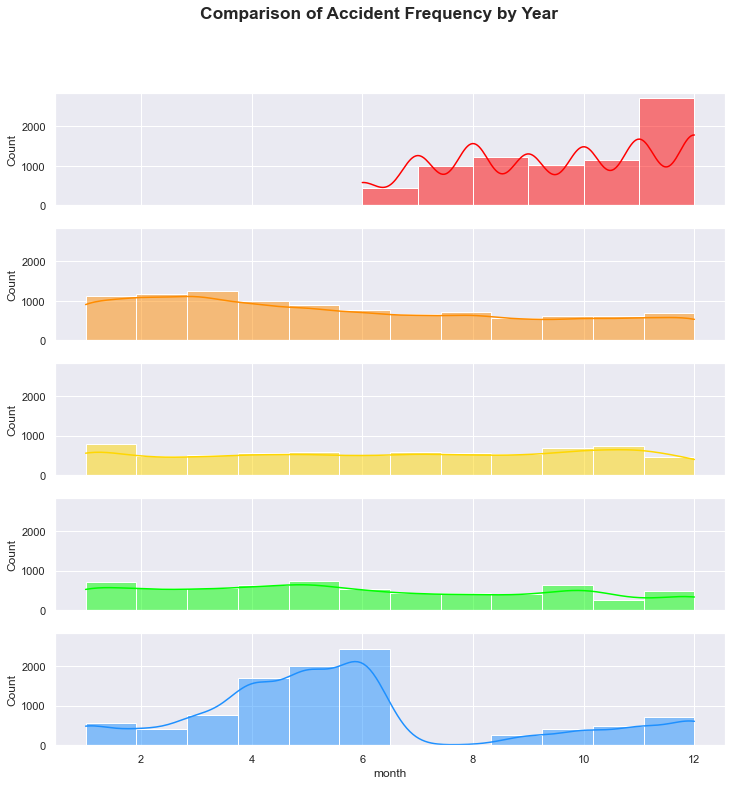

In [57]:
#setting up subplots and figsize:
fig, axs = plt.subplots(5, 1, sharex = True, sharey = True, figsize=(12, 12))

#setting title for 'overall' plot
fig.suptitle('Comparison of Accident Frequency by Year',
               fontsize = 'x-large', 
               fontweight = 'bold' )

#individual subplots:
sns.histplot(data=dia_2016, x="month", color="red", bins = 6, kde=True, ax=axs[0])
sns.histplot(data=dia_2017, x="month", color="darkorange", bins = 12, kde=True, ax=axs[1])
sns.histplot(data=dia_2018, x="month", color="gold", bins = 12, kde=True, ax=axs[2])
sns.histplot(data=dia_2019, x="month", color="lime", bins = 12, kde=True, ax=axs[3])
sns.histplot(data=dia_2020, x="month", color="dodgerblue", bins = 12, kde=True, ax=axs[4])

#displaying plot:
plt.show()

In [58]:
#the earliest available dates are in June 2016

dia_2016_11 = dia_2016.loc[dia_2016['month'] == 11]
dia_2016_11.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
0         2  42.305960 -87.960150  42.306916 -87.960918         0.077   
1         2  42.175870 -88.135770  42.174620 -88.135794         0.086   
2         3  42.175897 -88.135769  42.174612 -88.135794         0.089   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            37.0           31.0         79.0         29.59            10.0   
1            37.0           28.1         76.0         29.62            10.0   
2            37.0           28.1         76.0         29.62            10.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              8.1                0.0        0     0         0         0   
1             15.0                0.0        0     0         0         0   
2             15.0                0.0        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         0        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  start_time_ep   end_time_ep  \
0               1             0   1.480517e+09  1.480539e+09   
1               1             0   1.480518e+09  1.480540e+09   
2               1             0   1.480519e+09  1.480541e+09   

   weather_timestamp_ep  year  month  week  accident_duration  side_L  side_R  \
0          1.480518e+09  2016     11    48            21600.0       0       1   
1          1.480518e+09  2016     11    48            21600.0       1       0   
2          1.480518e+09  2016     11    48            22524.0       0       1   

   wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   

   wind_direction_ESE  wind_direction_N  wind_direction_NE  \
0                   0                 0                  0   
1                   0                 0                  0   
2                   0                 0                  0   

   wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   

   wind_direction_S  wind_direction_SE  wind_direction_SSE  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   

   wind_direction_SSW  wind_direction_SW  wind_direction_VAR  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   

   wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
0                 1                   0                   0   
1                 1                   0                   0   
2                 1                   0                   0   

   weather_condition_Blowing Snow  weather_condition_Clear  \
0                               0                        0   
1                               0                        0   
2                               0                        0   

   weather_condition_Cloudy  weather_condition_Cloudy / Windy  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   

   weather_condition_Drizzle  weather_condition_Fair  \
0                          0                       0   
1                          0                       0 

In [59]:
dia_2017_03 = dia_2017.loc[dia_2017['month'] == 3]
#dia_2017_03.head(3)

dia_2017_11 = dia_2017.loc[dia_2017['month'] == 11]
#dia_2017_11.head(3)

In [60]:
dia_2018_03 = dia_2018.loc[dia_2018['month'] == 3]
#dia_2018_03.head(3)

dia_2018_11 = dia_2018.loc[dia_2018['month'] == 11]
#dia_2018_11.head(3)

In [61]:
dia_2019_03 = dia_2019.loc[dia_2019['month'] == 3]
#dia_2019_03.head(3)

dia_2019_11 = dia_2019.loc[dia_2019['month'] == 11]
#dia_2019_11.head(3)

In [62]:
dia_2020_03 = dia_2020.loc[dia_2020['month'] == 3]
#dia_2020_03.head(3)

dia_2020_11 = dia_2020.loc[dia_2020['month'] == 11]
#dia_2020_11.head(3)

**Feature Engineering**

In [63]:
#making a function to apply to the df to make a new 'label' column
#1 if the accident took place during the week after DST
#0 if the accident took place during any other time of year

#https://stackoverflow.com/questions/59642338/creating-new-column-based-on-condition-on-other-column-in-pandas-dataframe
#https://stackoverflow.com/questions/13628791/determine-whether-integer-is-between-two-other-integers

def is_DST_week(epoch_time):
    if 1478390400 <= epoch_time <= (1478390400 + 604800): 
        return 1
    elif 1489276800 <= epoch_time <= (1489276800 + 604800):
        return 1
    elif 1509840000 <= epoch_time <= (1509840000 + 604800): 
        return 1
    elif 1520726400 <= epoch_time <= (1520726400 + 604800):
        return 1
    elif 1541289600 <= epoch_time <= (1541289600 + 604800):
        return 1
    elif 1552176000 <= epoch_time <= (1552176000 + 604800):
        return 1
    elif 1572739200 <= epoch_time <= (1572739200 + 604800):
        return 1
    elif 1583625600 <= epoch_time <= (1583625600 + 604800):
        return 1
    elif 1604275200 <= epoch_time <= (1604275200 + 604800):
        return 1
    else:
        return 0

dia_df["is_DST"] = dia_df["start_time_ep"].apply(lambda epoch_time: is_DST_week(epoch_time))

In [64]:
#confirming new column generated
dia_df.head(3)

severity  start_lat  start_lng    end_lat    end_lng  distance(mi)  \
0         2  42.305960 -87.960150  42.306916 -87.960918         0.077   
1         2  42.175870 -88.135770  42.174620 -88.135794         0.086   
2         3  42.175897 -88.135769  42.174612 -88.135794         0.089   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            37.0           31.0         79.0         29.59            10.0   
1            37.0           28.1         76.0         29.62            10.0   
2            37.0           28.1         76.0         29.62            10.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              8.1                0.0        0     0         0         0   
1             15.0                0.0        0     0         0         0   
2             15.0                0.0        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         0        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  start_time_ep   end_time_ep  \
0               1             0   1.480517e+09  1.480539e+09   
1               1             0   1.480518e+09  1.480540e+09   
2               1             0   1.480519e+09  1.480541e+09   

   weather_timestamp_ep  year  month  week  accident_duration  side_L  side_R  \
0          1.480518e+09  2016     11    48            21600.0       0       1   
1          1.480518e+09  2016     11    48            21600.0       1       0   
2          1.480518e+09  2016     11    48            22524.0       0       1   

   wind_direction_CALM  wind_direction_E  wind_direction_ENE  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   

   wind_direction_ESE  wind_direction_N  wind_direction_NE  \
0                   0                 0                  0   
1                   0                 0                  0   
2                   0                 0                  0   

   wind_direction_NNE  wind_direction_NNW  wind_direction_NW  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   

   wind_direction_S  wind_direction_SE  wind_direction_SSE  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   

   wind_direction_SSW  wind_direction_SW  wind_direction_VAR  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   

   wind_direction_W  wind_direction_WNW  wind_direction_WSW  \
0                 1                   0                   0   
1                 1                   0                   0   
2                 1                   0                   0   

   weather_condition_Blowing Snow  weather_condition_Clear  \
0                               0                        0   
1                               0                        0   
2                               0                        0   

   weather_condition_Cloudy  weather_condition_Cloudy / Windy  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   

   weather_condition_Drizzle  weather_condition_Fair  \
0                          0                       0   
1                          0                       0 

In [65]:
dia_df['is_DST'].value_counts(normalize = True)

0    0.958925
1    0.041075
Name: is_DST, dtype: float64

In [66]:
dia_df.to_csv('../data/dia_df_cleaned.csv', index=False)